## Ipl Data Analyais

In [126]:
#loading the required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [127]:
#loading the ipl matches dataset
ipl=pd.read_csv('ipl data.csv')

In [128]:
#having a glance at the first five records of the dataset
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [129]:
#Lookin at the number of rows and columns in the dataset
ipl.shape

(756, 18)

In [130]:
# finding missing values
ipl.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [131]:
#to fill missing values for umpire 1 and 2 we can take mode .. whatever value we get we fil it 
ipl['umpire1'].mode()[0]

'HDPK Dharmasena'

In [132]:
ipl['umpire1'].fillna('HDPK Dharmasena',inplace=True)

In [133]:
ipl['umpire2'].mode()[0]

'C Shamshuddin'

In [134]:
ipl['umpire2'].fillna('C Shamshuddin',inplace=True)

In [135]:
# 2 missing values in 'player_of_match' and 'winner' columns due to match is not played(Rain)
# fill that row using  'Match Abandoned'
removecolumns ={'player_of_match':'Match Abandoned','winner':'Match Abandoned'}
ipl.fillna(removecolumns,inplace=True)

In [136]:
# drop columns umprie 3
ipl.drop(columns='umpire3',inplace=True)

In [137]:
subset = ipl[ipl['city'].isnull()]
subset

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [138]:
# have 7 missing values in 'city' columns..
# fill with team1 city names
team1_values = subset['team1'].unique()
team1_values

array(['Mumbai Indians', 'Kolkata Knight Riders', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore'], dtype=object)

In [139]:
team1_values = subset['team2'].unique()
team1_values

array(['Royal Challengers Bangalore', 'Delhi Daredevils',
       'Rajasthan Royals', 'Chennai Super Kings', 'Kings XI Punjab',
       'Mumbai Indians'], dtype=object)

In [140]:
# used loc and split method to split 1st world of team having city name in it.. ex.Mumbai Indians

#ipl['city'].fillna(ipl['team1'].str.split().str[0], inplace=True)
ipl.loc[ipl['city'].isnull(), 'city'] = ipl['team1'].str.split().str[0]
#ipl[ipl['city'].isnull()].fillna(ipl['team1'].str.split().str[0], inplace=True)

In [141]:
# team had not city name in team name and fill with specific name 
ipl.loc[ipl['city'].str.contains('Royal')]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
474,475,2014,Royal,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi


In [142]:
ipl.loc[ipl['city'].str.contains('Sunrisers')]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
468,469,2014,Sunrisers,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
476,477,2014,Sunrisers,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [143]:
ipl.loc[ipl['city'].str.contains('royal', case=False, na=False), 'city'] = 'Bangalore'


In [144]:
ipl.loc[ipl['city'].str.contains('Sunrisers', case=False, na=False), 'city'] = 'Hyderabad'


In [145]:
ipl.iloc[474]

id                                                 475
season                                            2014
city                                         Bangalore
date                                        2014-04-28
team1                      Royal Challengers Bangalore
team2                                  Kings XI Punjab
toss_winner                            Kings XI Punjab
toss_decision                                    field
result                                          normal
dl_applied                                           0
winner                                 Kings XI Punjab
win_by_runs                                          0
win_by_wickets                                       5
player_of_match                         Sandeep Sharma
venue              Dubai International Cricket Stadium
umpire1                                      BF Bowden
umpire2                                         S Ravi
Name: 474, dtype: object

In [146]:
ipl.iloc[468]

id                                                 469
season                                            2014
city                                         Hyderabad
date                                        2014-04-25
team1                              Sunrisers Hyderabad
team2                                 Delhi Daredevils
toss_winner                        Sunrisers Hyderabad
toss_decision                                      bat
result                                          normal
dl_applied                                           0
winner                             Sunrisers Hyderabad
win_by_runs                                          4
win_by_wickets                                       0
player_of_match                               AJ Finch
venue              Dubai International Cricket Stadium
umpire1                                      M Erasmus
umpire2                                         S Ravi
Name: 468, dtype: object

In [147]:
ipl.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

<Axes: xlabel='toss_decision'>

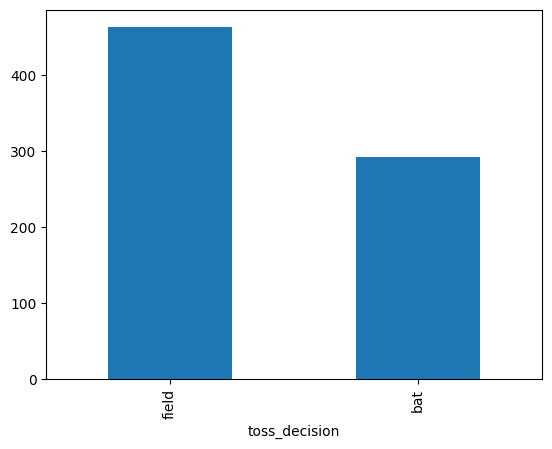

In [148]:
# count of toss decision made 
ipl['toss_decision'].value_counts().plot(kind='bar')

In [149]:
#Getting the frequency of most man of the match awards
ipl['player_of_match'].value_counts()

player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: count, Length: 227, dtype: int64

In [150]:
#Getting the top 10 players with most man of the match awards
ipl['player_of_match'].value_counts()[0:10]

player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: count, dtype: int64

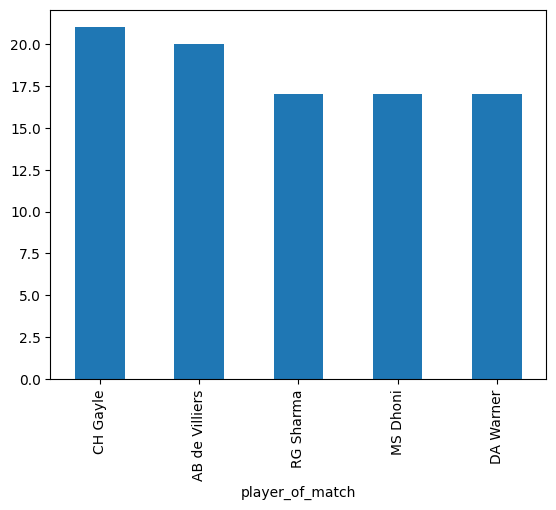

In [151]:
#Getting the top 5 players with most man of the match awards
mostman_of_match = ipl['player_of_match'].value_counts()[0:5].plot(kind='bar')

In [152]:
#making a bar-plot for the top 5 players with most man of the match awards
# plt.figure(figsize=(6,5))
# plt.bar(list(ipl['player_of_match'].value_counts()[0:5].keys()),list(ipl['player_of_match'].value_counts()[0:5]))
# plt.show()

In [153]:
#Getting the frequency of result column
value = ipl['result'].value_counts()
print(str(value))

result
normal       743
tie            9
no result      4
Name: count, dtype: int64


sure the count is treated as text when working with textual elements in plots...
convert the number to a string using the str() function:


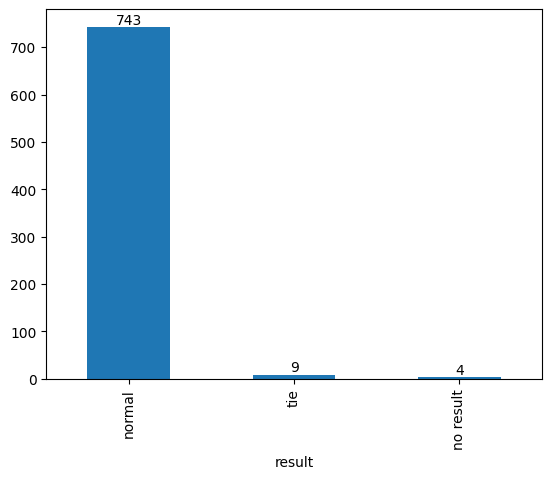

In [154]:
value = ipl['result'].value_counts() #
chart = value.plot(kind='bar')
for index, i in enumerate(value):
    chart.text(index, i, str(i), ha='center', va='bottom')

In [155]:
#Finding out the number of toss wins w.r.t each team
count = ipl['toss_winner'].value_counts()
name1 = ipl['toss_winner'].value_counts().index
count

toss_winner
Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: count, dtype: int64

In [156]:
#original code

# plt.bar(name1, count, label='Data Points', color='blue')
# plt.xticks(rotation=90)
# plt.show()


Text(0.5, 1.0, 'Bar Chart with Count Labels')

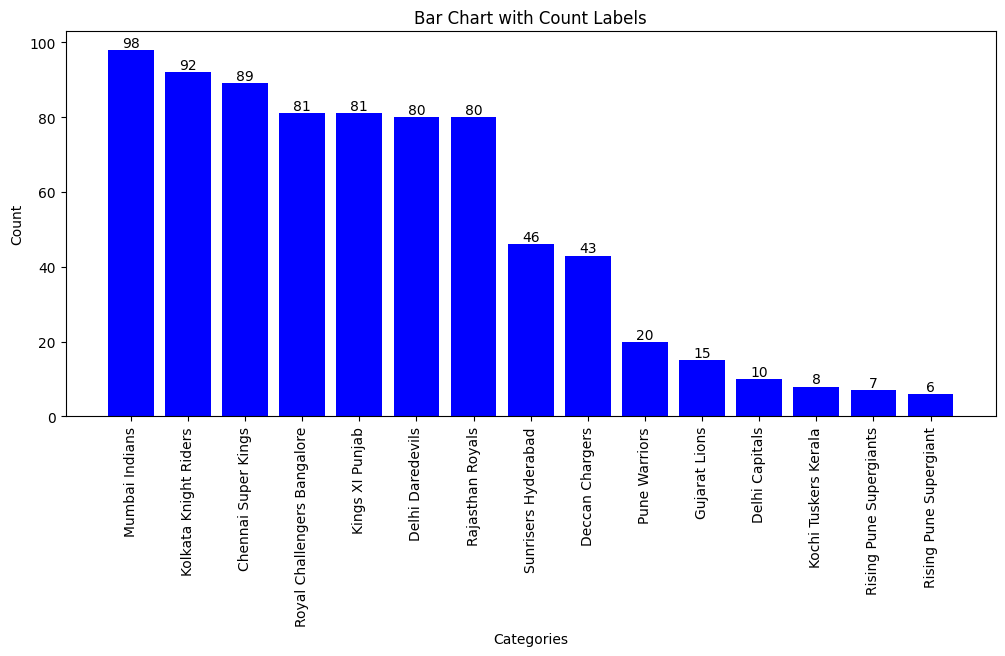

In [157]:
plt.figure(figsize=(12,5))

chart = plt.bar(name1, count, color='blue')

for index, value in enumerate(count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=90)  
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Chart with Count Labels')

In [158]:
#Extracting the records where a team won batting first
batting_first=ipl[ipl['win_by_runs']!=0]

In [159]:
batting_first = ipl[ipl['win_by_runs'] != 0][['team1', 'win_by_runs']]


In [160]:
#Looking at the head
len(batting_first)


337

In [161]:
batting_first.head()

,team1,win_by_runs
0,Sunrisers Hyderabad,35
4,Royal Challengers Bangalore,15
8,Delhi Daredevils,97
13,Kolkata Knight Riders,17
14,Delhi Daredevils,51


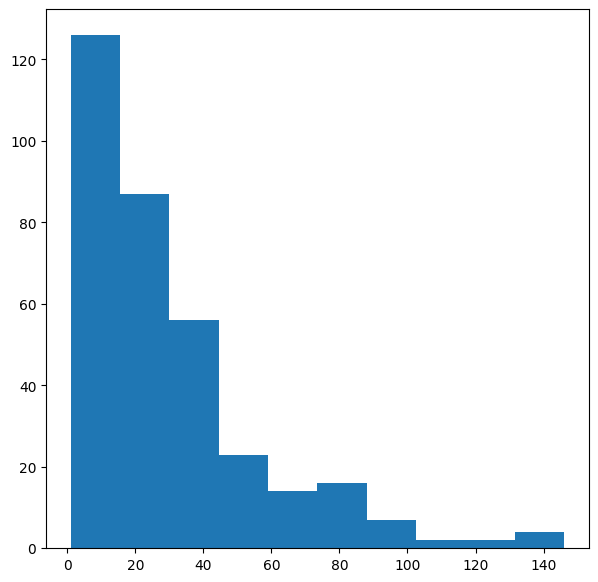

In [162]:
#Making a histogram 
plt.figure(figsize=(7,7))
plt.hist(batting_first['win_by_runs'])
plt.show()

In [163]:
ipl

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,HDPK Dharmasena,C Shamshuddin
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [164]:
#Finding out the number of wins w.r.t each team after batting first
ipl['winner'].value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Match Abandoned                  4
Name: count, dtype: int64

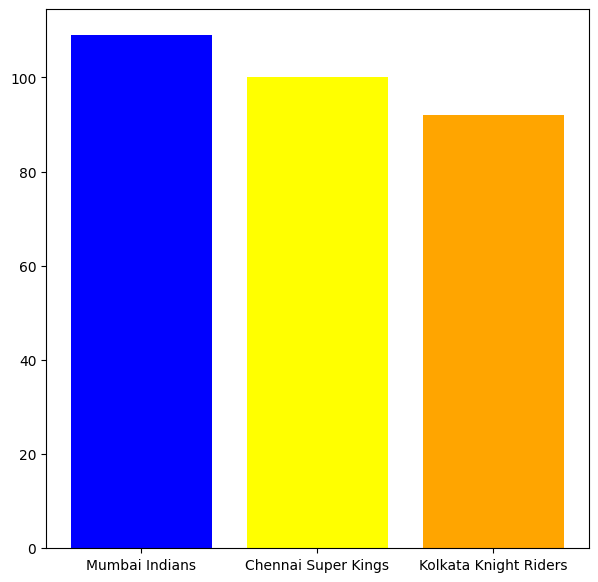

In [165]:
#Making a bar-plot for top 3 teams with most wins after batting first
plt.figure(figsize=(7,7))
plt.bar(list(ipl['winner'].value_counts()[0:3].keys()),list(ipl['winner'].value_counts()[0:3]),color=["blue","yellow","orange"])
plt.show()

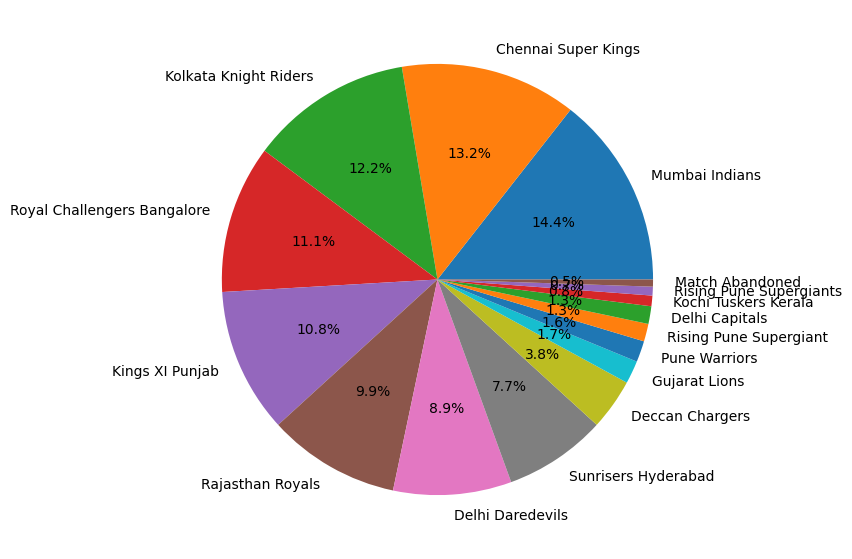

In [166]:
#Making a pie chart
plt.figure(figsize=(7,7))
plt.pie(list(ipl['winner'].value_counts()),labels=list(ipl['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [167]:
#extracting those records where a team has won after batting second
batting_second=ipl[ipl['win_by_wickets']!=0]

In [168]:
#looking at the head
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan


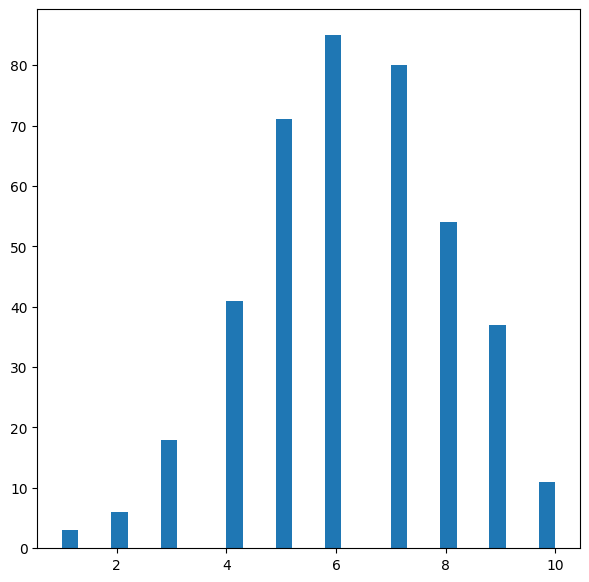

In [169]:
#Making a histogram for frequency of wins w.r.t number of wickets
plt.figure(figsize=(7,7))
plt.hist(batting_second['win_by_wickets'],bins=30)
plt.show()

In [170]:
#Finding out the frequency of number of wins w.r.t each time after batting second
batting_second['winner'].value_counts()

winner
Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: count, dtype: int64

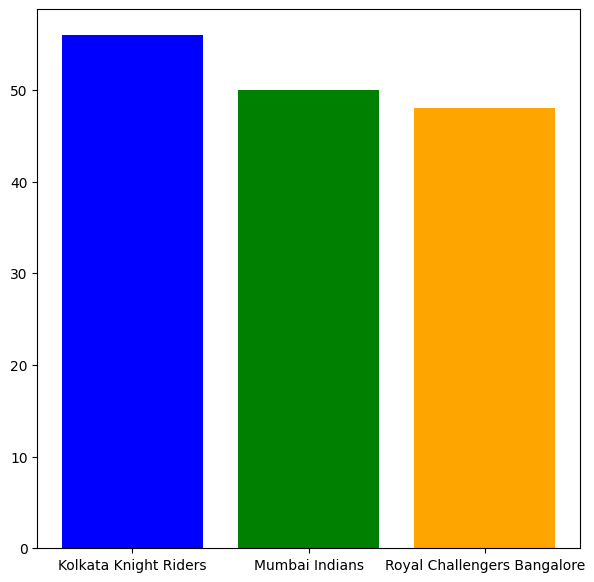

In [171]:
#Making a bar plot for top-3 teams with most wins after batting second
plt.figure(figsize=(7,7))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=["blue","green","orange"])
plt.show()

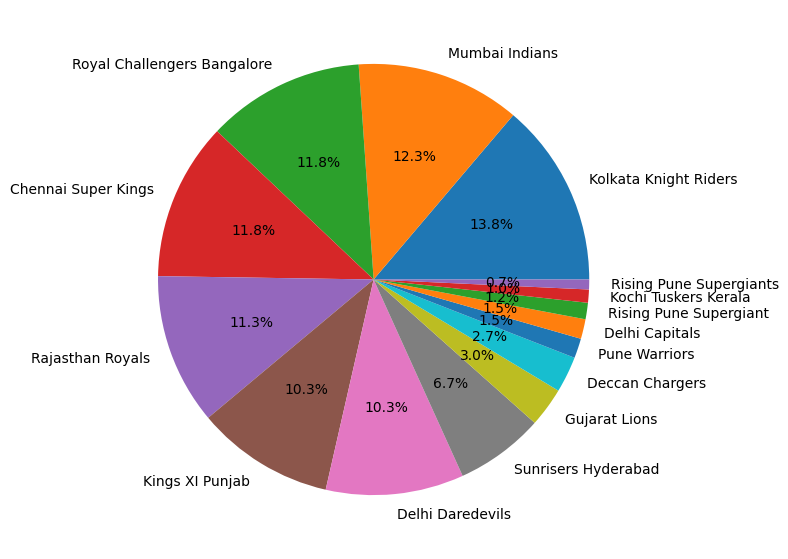

In [172]:
#Making a pie chart for distribution of most wins after batting second
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [173]:
#Looking at the number of matches played each season
ipl['season'].value_counts()

season
2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: count, dtype: int64

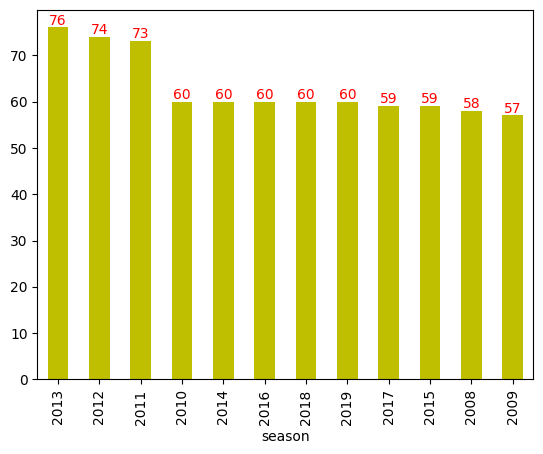

In [174]:
count = ipl['season'].value_counts()
chart = count.plot(kind='bar',color='y')

for index, i in enumerate(count):
    chart.text(index, i, str(i), ha='center', va='bottom',color='r')

In [175]:
#Looking at the number of matches played in each city
ipl['city'].value_counts()

city
Mumbai            103
Kolkata            78
Delhi              74
Bangalore          67
Hyderabad          66
Chennai            58
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

In [177]:
#Finding out how many times a team has won the match after winning the toss
import numpy as np
np.sum(ipl['toss_winner']==ipl['winner'])

393

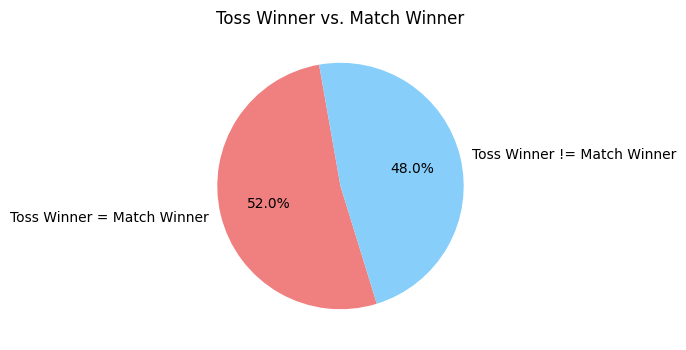

In [ ]:
#This code calculates the count of times the toss winner also won the match and the count of times they were not the match winner.
#It then creates a pie chart to visualize the percentage of each outcome. 


count = (ipl['toss_winner'] == ipl['winner']).sum()
not_count = len(ipl) - count

labels = ['Toss Winner = Match Winner', 'Toss Winner != Match Winner']
sizes = [count, not_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0)  

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=100)
plt.title('Toss Winner vs. Match Winner')
plt.show()
